In [2]:
#import all libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
#read ipl.csv file and print first 5 records
df=pd.read_csv('ipl data.csv')
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
#check total number of columns,entries note down your findings
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               636 non-null    int64  
 1   season           636 non-null    int64  
 2   city             629 non-null    object 
 3   date             636 non-null    object 
 4   team1            636 non-null    object 
 5   team2            636 non-null    object 
 6   toss_winner      636 non-null    object 
 7   toss_decision    636 non-null    object 
 8   result           636 non-null    object 
 9   dl_applied       636 non-null    int64  
 10  winner           633 non-null    object 
 11  win_by_runs      636 non-null    int64  
 12  win_by_wickets   636 non-null    int64  
 13  player_of_match  633 non-null    object 
 14  venue            636 non-null    object 
 15  umpire1          635 non-null    object 
 16  umpire2          635 non-null    object 
 17  umpire3         

* There are total 636 entries all over and 17 columns

In [5]:
# find null values 
df.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

* Some columns are containing null data init
* Umpire# has the highest amount of null data

In [6]:
#drop null values of city , winner ,player_of_match,umpire1,umpire2 column
df.dropna(subset=['city','winner','player_of_match','umpire1','umpire2'],inplace=True)

In [7]:
#drop umpire3 column as it contains more than 75% of null values
df.drop('umpire3',axis=1,inplace=True)

* Umpire3 has the highest amount of null data which is nearly 100%
* There is no need to keep Umpire3 as it doesnt contains any logical data

<AxesSubplot:>

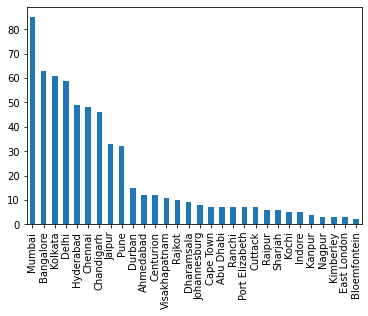

In [8]:
#which city hosted most number of matches?
#draw bar plot and write down your insights
df['city'].value_counts().plot(kind="bar")

* In mumbai most ipl match have been played 
* On the other side Bloemfontein has the least amount of matches played

In [9]:
#find all venue of mumbai city
df[df['city']=='Mumbai']['venue'].unique()

array(['Wankhede Stadium', 'Dr DY Patil Sports Academy',
       'Brabourne Stadium'], dtype=object)

* There are total of 3 stadiums in Mumbai

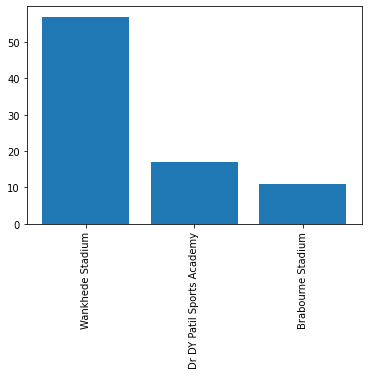

In [10]:
#now compare in which venue of mumbai most number of matches played (draw bar plot and  write down insights)
a=df[df['city']=='Mumbai']['venue'].unique()
b=df[df['city']=='Mumbai']['venue'].value_counts()
plt.xticks(rotation=90)
plt.bar(a,b)
plt.show()

* Wankhede stadium has the highest amount of matches played in Mumbai
* While on the other 

In [10]:
#what is the preferred choice after winning a toss in mumbai
df[df['city']=='Mumbai']['toss_decision'].value_counts()

field    51
bat      34
Name: toss_decision, dtype: int64

* By analyzing this we can state that after winning toss most teams choose field in Mumbai
* While very few team considers to choose bat

<AxesSubplot:>

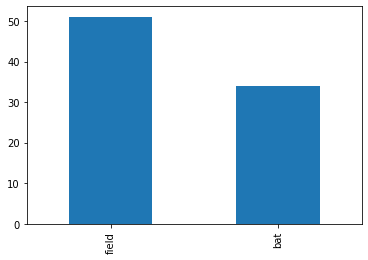

In [11]:
#graphical representation of above question
df[df['city']=='Mumbai']['toss_decision'].value_counts().plot(kind='bar')

* By analyzing this we can state that after winning toss most teams choose field in Mumbai
* While very few team considers to choose bat

In [12]:
#which team won most number of toss
df['toss_winner'].value_counts()

Mumbai Indians                 83
Kolkata Knight Riders          77
Delhi Daredevils               71
Royal Challengers Bangalore    67
Kings XI Punjab                67
Chennai Super Kings            66
Rajasthan Royals               61
Deccan Chargers                43
Sunrisers Hyderabad            34
Pune Warriors                  20
Gujarat Lions                  15
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

* Mumbai Indians won the most number of toss followed by Kolkata Night Riders
* Rising Pune Super has won least number of toss throughout the other teams

<AxesSubplot:>

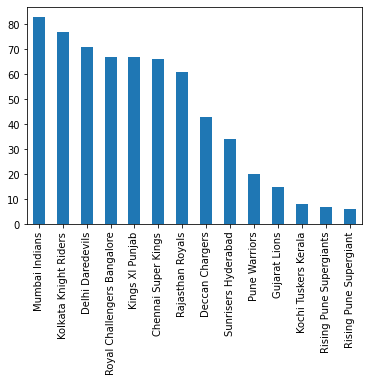

In [13]:
#show graphical representation of above question
df['toss_winner'].value_counts().plot(kind='bar')

* By seeing graph you can state the information of who won most toss in matches

In [14]:
#find what mumbai indians preferred after winning a toss?
df[df['toss_winner']=='Mumbai Indians']['toss_decision'].value_counts()

field    44
bat      39
Name: toss_decision, dtype: int64

* Mumbai indians mostly prefers to field than batting after winning the toss
* However there is a slight difference in chooseing decisions

In [5]:
#head to head winning count of Mumbai Indians vs Chennai Super Kings
df[(df['team1']=='Chennai Super Kings')&(df['team2']=='Mumbai Indians')|((df['team2']=='Chennai Super Kings')&(df['team1']=='Mumbai Indians'))]['winner'].value_counts()

Mumbai Indians         12
Chennai Super Kings    10
Name: winner, dtype: int64

* Most matches between Mumbai Indians and Chennai Super Kings are won by Mumbai Indians
* There is a chase of winning by Chennai Super Kings over Mumbai Indians too

In [19]:
#Which team won most of the matches in mumbai?
df[df['city']=='Mumbai']['winner'].value_counts()

Mumbai Indians                 45
Chennai Super Kings             8
Kings XI Punjab                 5
Royal Challengers Bangalore     5
Rajasthan Royals                5
Deccan Chargers                 3
Kolkata Knight Riders           3
Pune Warriors                   3
Rising Pune Supergiant          2
Delhi Daredevils                2
Kochi Tuskers Kerala            1
Sunrisers Hyderabad             1
Rising Pune Supergiants         1
Gujarat Lions                   1
Name: winner, dtype: int64

* In mumbai, Mumbai Indians has won the most matches throughout all teams
* While on the other side Gujrat Lions,Pune, Hyderabad and Kerela teams has won the least matches

In [38]:
#how many times each team won the toss and won the match
df[(df['toss_winner']==df['winner'])]['winner'].value_counts()

Mumbai Indians                 48
Kolkata Knight Riders          44
Chennai Super Kings            42
Rajasthan Royals               34
Delhi Daredevils               33
Royal Challengers Bangalore    33
Kings XI Punjab                27
Deccan Chargers                19
Sunrisers Hyderabad            16
Gujarat Lions                  10
Rising Pune Supergiant          5
Kochi Tuskers Kerala            4
Pune Warriors                   3
Rising Pune Supergiants         3
Name: winner, dtype: int64

* Mumbai indians have won most tosses also won most matches as compared to other teams 
* While on other side Pune has won the least matches through other teams

In [21]:
#how many times each team won the toss and won the match in mumbai
df[(df['toss_winner']==df['winner'])&(df['city']=='Mumbai')]['winner'].value_counts()

Mumbai Indians                 26
Chennai Super Kings             5
Deccan Chargers                 3
Rajasthan Royals                2
Delhi Daredevils                2
Royal Challengers Bangalore     2
Kochi Tuskers Kerala            1
Kolkata Knight Riders           1
Gujarat Lions                   1
Name: winner, dtype: int64

* Mumbai Indians has one-sidedly won the matches in this category
* While on the other side Gujarat Lions,Kolkata Knight Riders,Kochi Tuskers Kerala have won only 1 match

<AxesSubplot:>

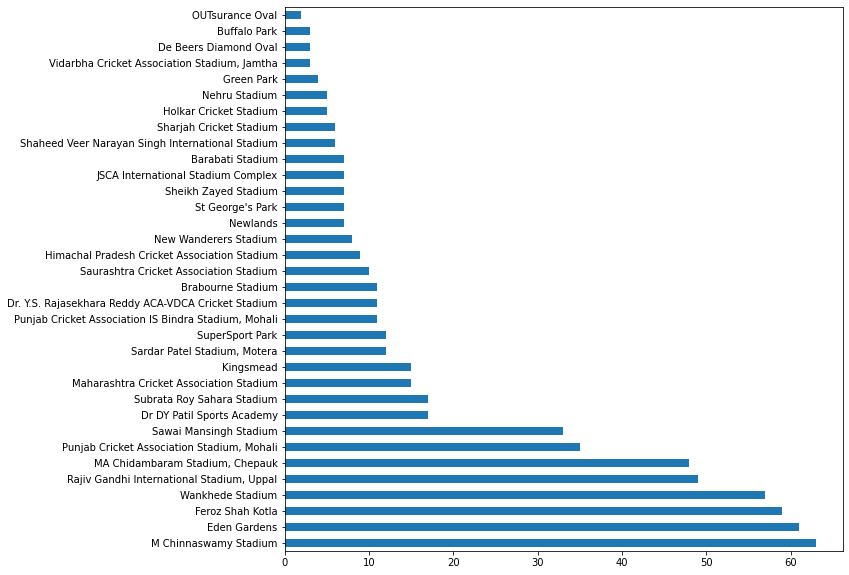

In [22]:
#which venue hosted most number of matches
df['venue'].value_counts().plot(kind="barh",figsize=(10,10))

* As we can see M Chinnaswamy Stadium, Eden Gardens, Feroz Shah Kotla and Rajiv Gandhi has most organized matches 
* M Chinnaswamy Stadium has the highest matches played in it
* While OUTsurance Oval Stadium has the lowest matches played

In [7]:
#find how many matches chennai super kings played at M Chinnaswamy stadium?
a=df[(df['team1']=='Chennai Super Kings')|(df['team2']=='Chennai Super Kings')]['venue'].value_counts()
a['M Chinnaswamy Stadium']

7

* chennai super kings played 7 matches in M Chinnaswamy stadium

In [25]:
#who won most matches at M Chinnaswamy stadium?
df[df['venue']=='M Chinnaswamy Stadium']['winner'].value_counts()

Royal Challengers Bangalore    29
Mumbai Indians                  8
Kolkata Knight Riders           6
Kings XI Punjab                 5
Chennai Super Kings             4
Rajasthan Royals                3
Delhi Daredevils                3
Sunrisers Hyderabad             2
Rising Pune Supergiant          1
Gujarat Lions                   1
Deccan Chargers                 1
Name: winner, dtype: int64

* First of all by suspecting all results we can say that the home teams have won the most matches in their home stadium
* Royal Challengers Banglore have won most of the matches in M Chinnaswamy stadium

# year wise analysis

In [ ]:
#matches played in each year

In [26]:
#lets analyse ipl season held in 2013
#extract all the details of 2013 season
#here we will create yearwise groups (hint: use groupby() function)
a=df.groupby('season')
a.get_group(2013)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
381,382,2013,Kolkata,2013-04-03,Delhi Daredevils,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,6,SP Narine,Eden Gardens,S Ravi,SJA Taufel
382,383,2013,Bangalore,2013-04-04,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,normal,0,Royal Challengers Bangalore,2,0,CH Gayle,M Chinnaswamy Stadium,VA Kulkarni,C Shamshuddin
383,384,2013,Hyderabad,2013-04-05,Sunrisers Hyderabad,Pune Warriors,Pune Warriors,field,normal,0,Sunrisers Hyderabad,22,0,A Mishra,"Rajiv Gandhi International Stadium, Uppal",S Ravi,SJA Taufel
384,385,2013,Delhi,2013-04-06,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Rajasthan Royals,5,0,R Dravid,Feroz Shah Kotla,S Das,C Shamshuddin
385,386,2013,Chennai,2013-04-06,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,9,0,KA Pollard,"MA Chidambaram Stadium, Chepauk",M Erasmus,VA Kulkarni
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,453,2013,Hyderabad,2013-05-19,Kolkata Knight Riders,Sunrisers Hyderabad,Kolkata Knight Riders,bat,normal,0,Sunrisers Hyderabad,0,5,PA Patel,"Rajiv Gandhi International Stadium, Uppal",Asad Rauf,S Asnani
453,454,2013,Delhi,2013-05-21,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Chennai Super Kings,48,0,MEK Hussey,Feroz Shah Kotla,NJ Llong,RJ Tucker
454,455,2013,Delhi,2013-05-22,Sunrisers Hyderabad,Rajasthan Royals,Sunrisers Hyderabad,bat,normal,0,Rajasthan Royals,0,4,BJ Hodge,Feroz Shah Kotla,S Ravi,RJ Tucker
455,456,2013,Kolkata,2013-05-24,Rajasthan Royals,Mumbai Indians,Rajasthan Royals,bat,normal,0,Mumbai Indians,0,4,Harbhajan Singh,Eden Gardens,C Shamshuddin,SJA Taufel


* This shows the data of matches played in the year 2013

In [53]:
#which city hosted most number of matches in 2013 
df[df['season']==2013]['city'].value_counts()

Kolkata       8
Bangalore     8
Hyderabad     8
Delhi         8
Chennai       8
Pune          8
Jaipur        8
Mumbai        8
Chandigarh    6
Dharamsala    2
Raipur        2
Ranchi        2
Name: city, dtype: int64

* Here every team have hosted same amount of matches in 2013
* But Dharmasala, Raipur and Ranchi have hosted least matches in 2013